#World Happiness Report Project
>Name: Rajdipsinh Gohil
Batch No: DS2306

In [6]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Loading Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


>There are 158 rows and 12 columns respectively present in the dataset.

In [8]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:
#Renaming the Columns for our convenience
df.rename(columns={
    "Happiness Rank": "Happiness_Rank",
    "Happiness Score": "Happiness_Score",
    "Standard Error": "Standard_Error",
    "Economy (GDP per Capita)": "Economy",
    "Health (Life Expectancy)": "Health_Life_Expectancy",
    "Trust (Government Corruption)": "Trust_Government_Corruption",
    "Dystopia Residual": "Dystopia_Residual"
}, inplace=True)

In [11]:
df.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy', 'Family', 'Health_Life_Expectancy',
       'Freedom', 'Trust_Government_Corruption', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')


> All columns have been renamed to use simpler names.

In [12]:
df.nunique()

Country                        158
Region                          10
Happiness_Rank                 157
Happiness_Score                157
Standard_Error                 153
Economy                        158
Family                         158
Health_Life_Expectancy         157
Freedom                        158
Trust_Government_Corruption    157
Generosity                     158
Dystopia_Residual              158
dtype: int64

> "Region" column has only 10 distinct values.

In [13]:
#Checking for missing values in our data
df.isnull().sum()

Country                        0
Region                         0
Happiness_Rank                 0
Happiness_Score                0
Standard_Error                 0
Economy                        0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Trust_Government_Corruption    0
Generosity                     0
Dystopia_Residual              0
dtype: int64

<Axes: >

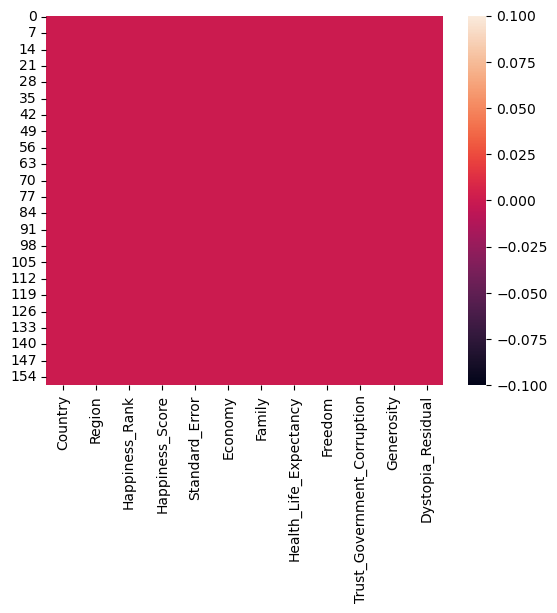

In [14]:
#lets visualise it
sns.heatmap(df.isnull())

> We can clearly see that there are no null values in dataframe.

#### Separating Numerical and Categorical Columns

In [15]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:\n",numerical_columns)
print("\nCategorical Columns:\n",categorical_columns)

Numerical Columns:
 ['Happiness_Rank', 'Happiness_Score', 'Standard_Error', 'Economy', 'Family', 'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual']

Categorical Columns:
 ['Country', 'Region']


In [16]:
#statistical Summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness_Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness_Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard_Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy,158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health_Life_Expectancy,158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust_Government_Corruption,158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia_Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [17]:
#Exploring Our Target Column Happiness Score.
df['Happiness_Score'].value_counts().to_frame("Unique Values")

,Unique Values
5.192,2
7.587,1
4.686,1
4.839,1
4.800,1
...,...
5.855,1
5.848,1
5.833,1
5.828,1



>  "Happiness score" column contains values in range of 2.83900 to 7.587. So we can create a new column based on the Happiness Score

In [18]:
# Create a list to store the predicted happiness category
happiness = []

for score in df['Happiness_Score']:
    if score < 4:
        happiness.append("UNHAPPY")
    elif score >= 4 and score <= 6:
        happiness.append("NORMAL")
    else:
        happiness.append("HAPPY")

pred_happiness = pd.DataFrame(happiness, columns=["Predicted_Happiness"])
pred_happiness = pred_happiness.astype('category')
data = pd.concat([df, pred_happiness], axis=1)

NORMAL     93
HAPPY      44
UNHAPPY    21
Name: Predicted_Happiness, dtype: int64


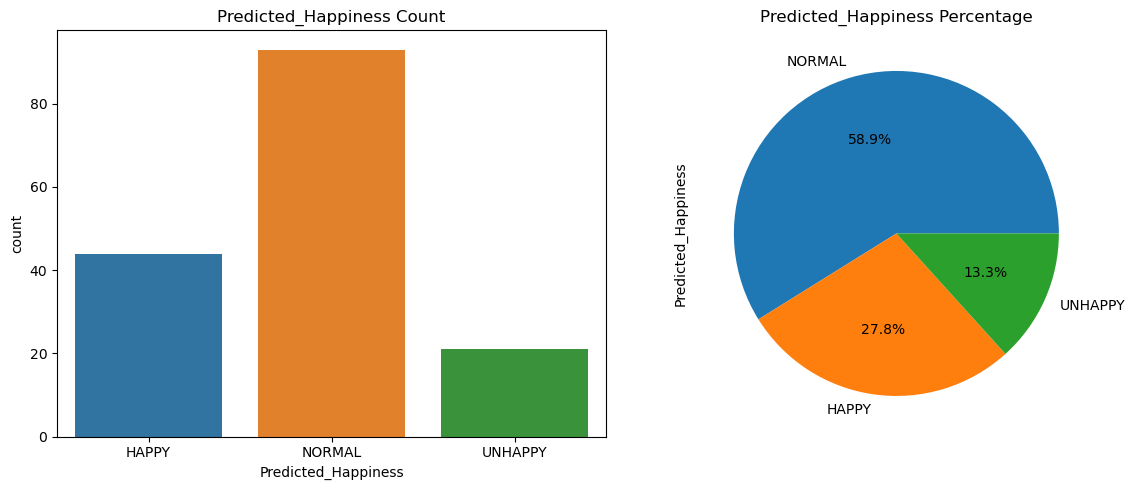

In [19]:
#Checkig the Distribution of Hapiness Score
print(data['Predicted_Happiness'].value_counts())

# Checking the Predicted Happiness
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Predicted_Happiness', data=data, ax=axes[0])
axes[0].set_title("Predicted_Happiness Count")

# Checking the Survived percentage
data['Predicted_Happiness'].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[1])
axes[1].set_title("Predicted_Happiness Percentage")
plt.tight_layout()
plt.show()

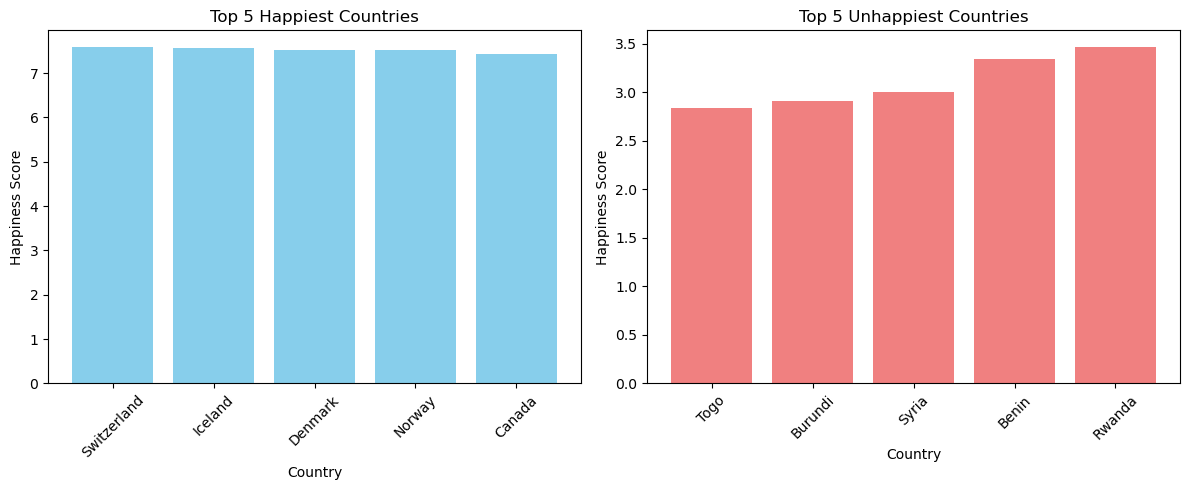

In [20]:
#Checking Top 5 Happy & Unhappy countries

# Sort the data by 'Happiness_Score' in descending order and select the top 5 happiest and unhappiest countries
top_5_happiest_countries = data.sort_values('Happiness_Score', ascending=False).head(5)
top_5_unhappiest_countries = data.sort_values('Happiness_Score', ascending=True).head(5)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loop to create both bar charts
for i, (countries, title, color) in enumerate(
    [(top_5_happiest_countries, 'Top 5 Happiest Countries', 'skyblue'),
     (top_5_unhappiest_countries, 'Top 5 Unhappiest Countries', 'lightcoral')]):
    ax = axes[i]
    ax.bar(countries['Country'], countries['Happiness_Score'], color=color)
    ax.set_xlabel('Country')
    ax.set_ylabel('Happiness Score')
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()
# Show the combined figure
plt.show()

### Dropping columns

In [21]:
data = data.drop(['Country', 'Region', 'Happiness_Rank','Predicted_Happiness'], axis=1)
data.head(5)

,Happiness_Score,Standard_Error,Economy,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


>I have removed the categorical columns 'Country,' 'Predicted_Happiness,' and 'Region,' as well as 'Happiness Rank,' which consisted of sequential numeric data.

### MultiVariate Analysis

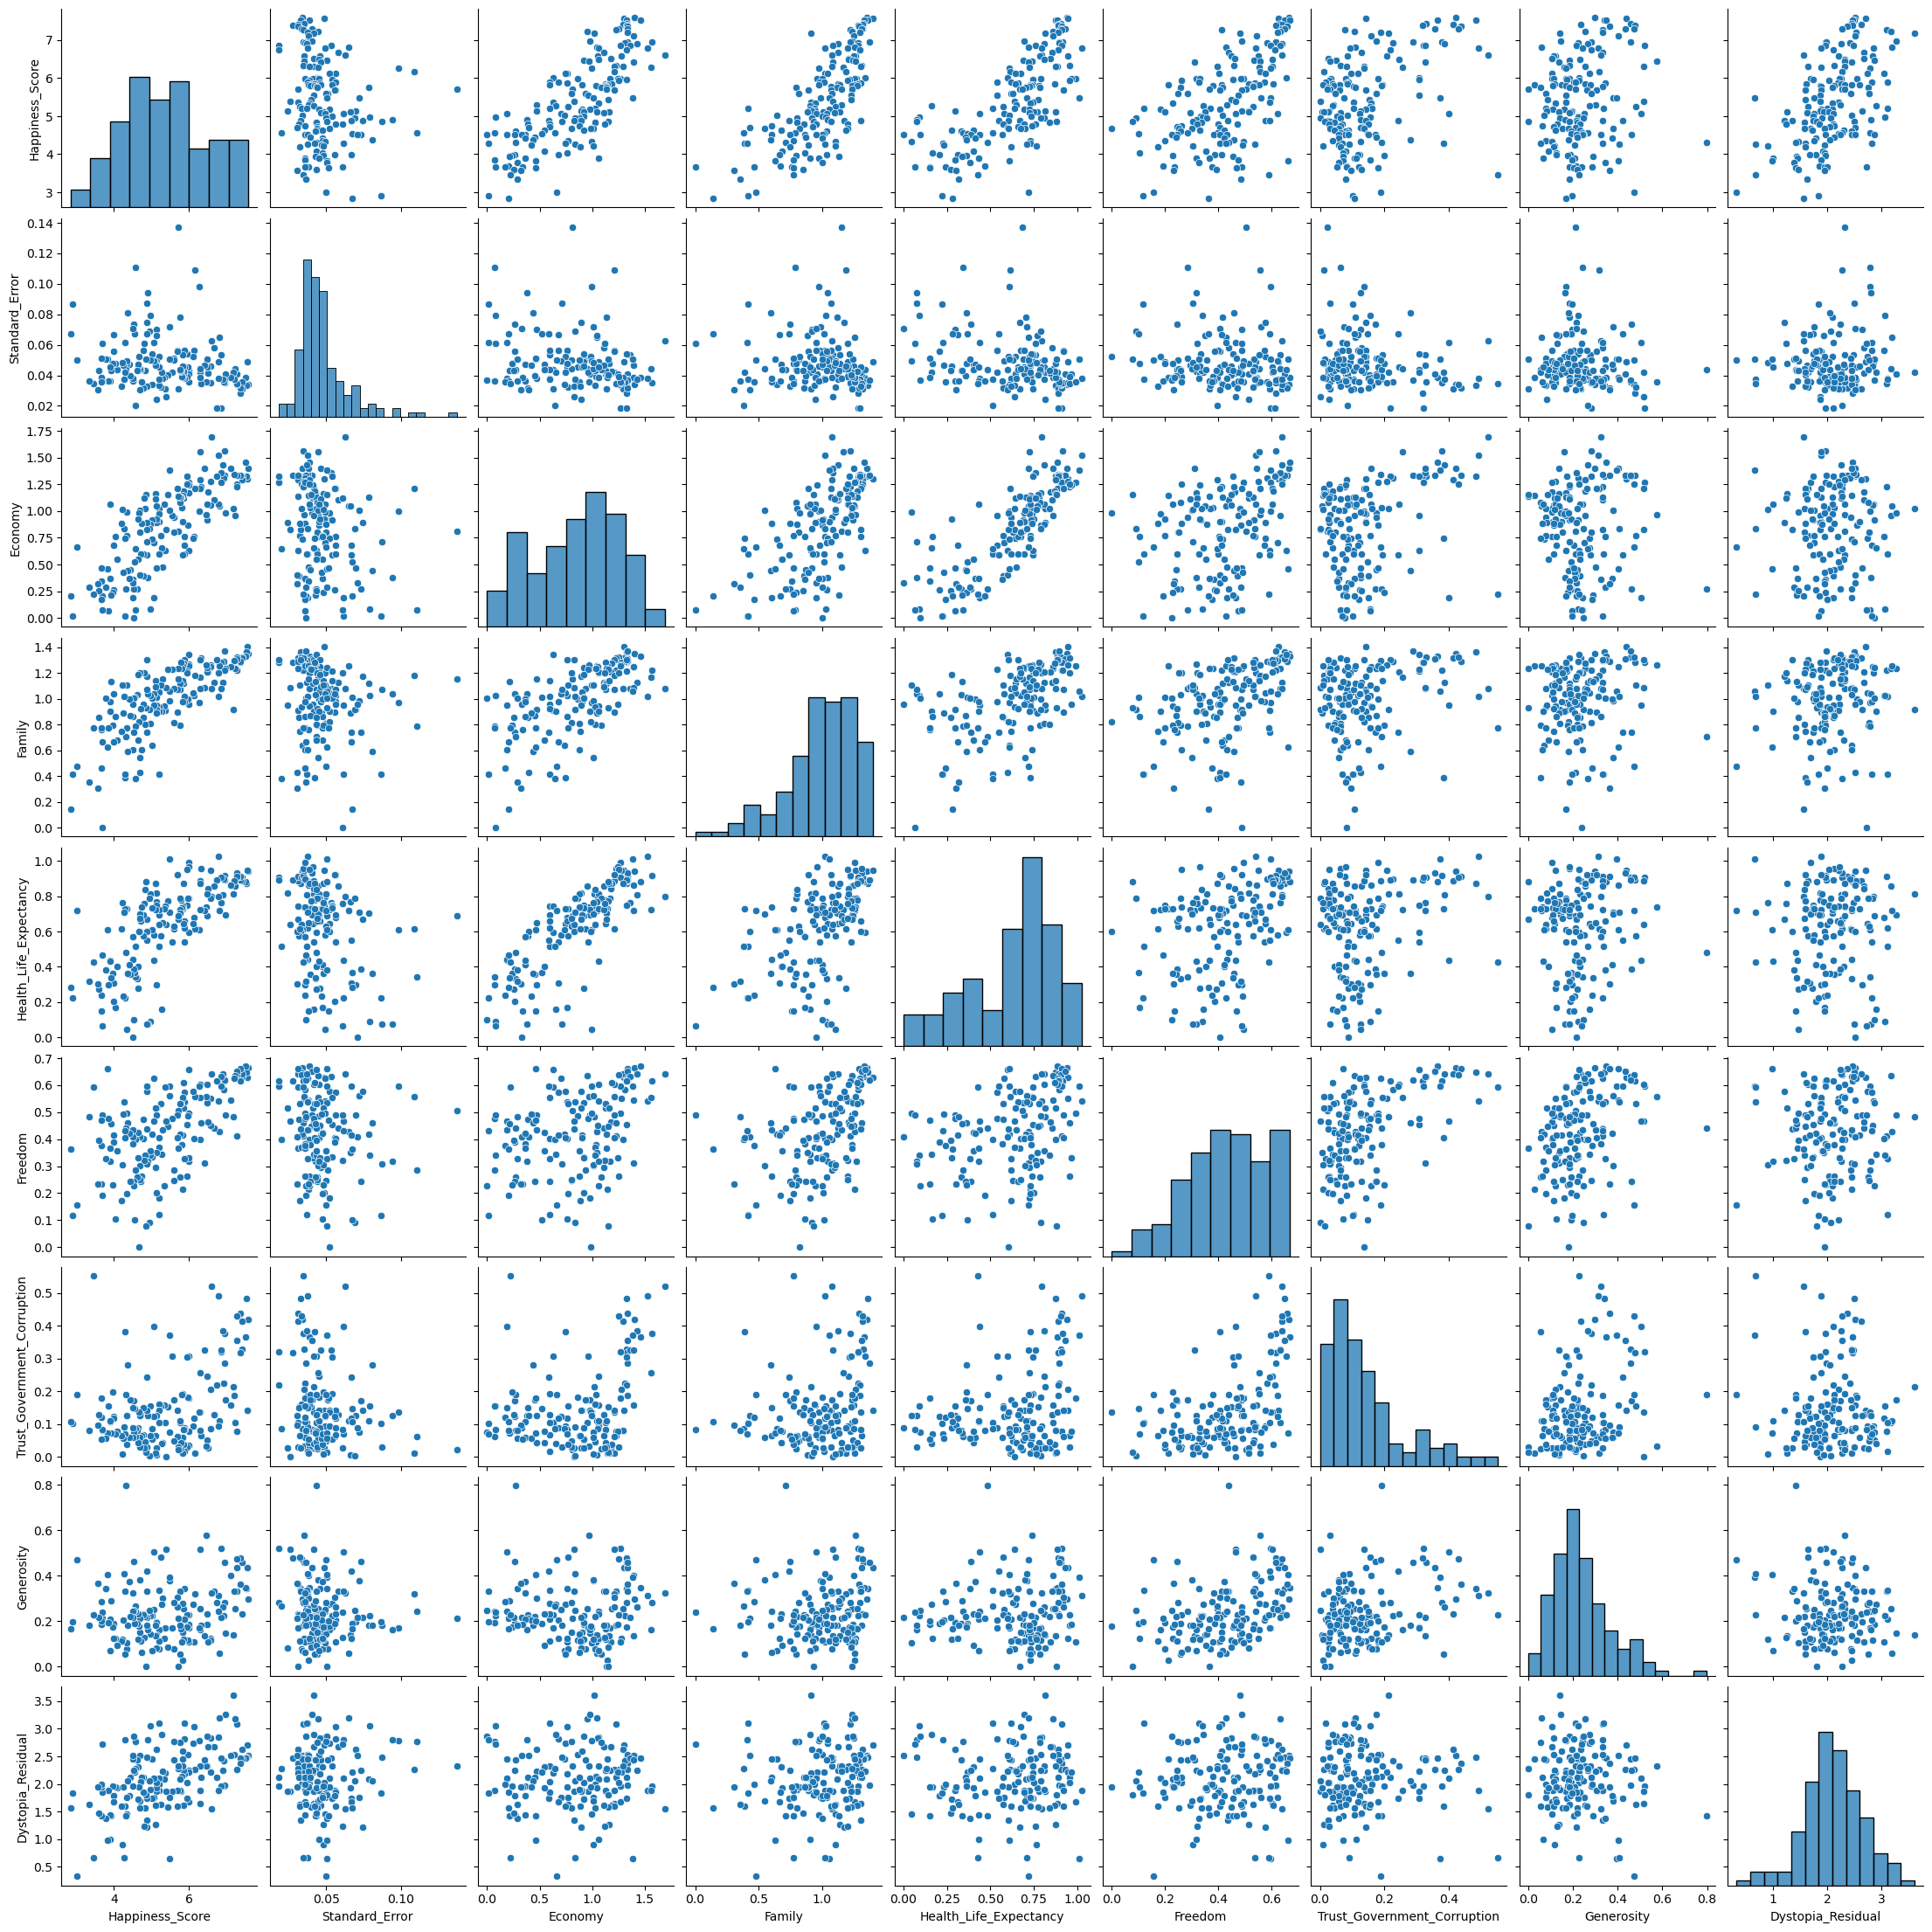

In [22]:
sns.pairplot(data)
plt.show()

## Skewness

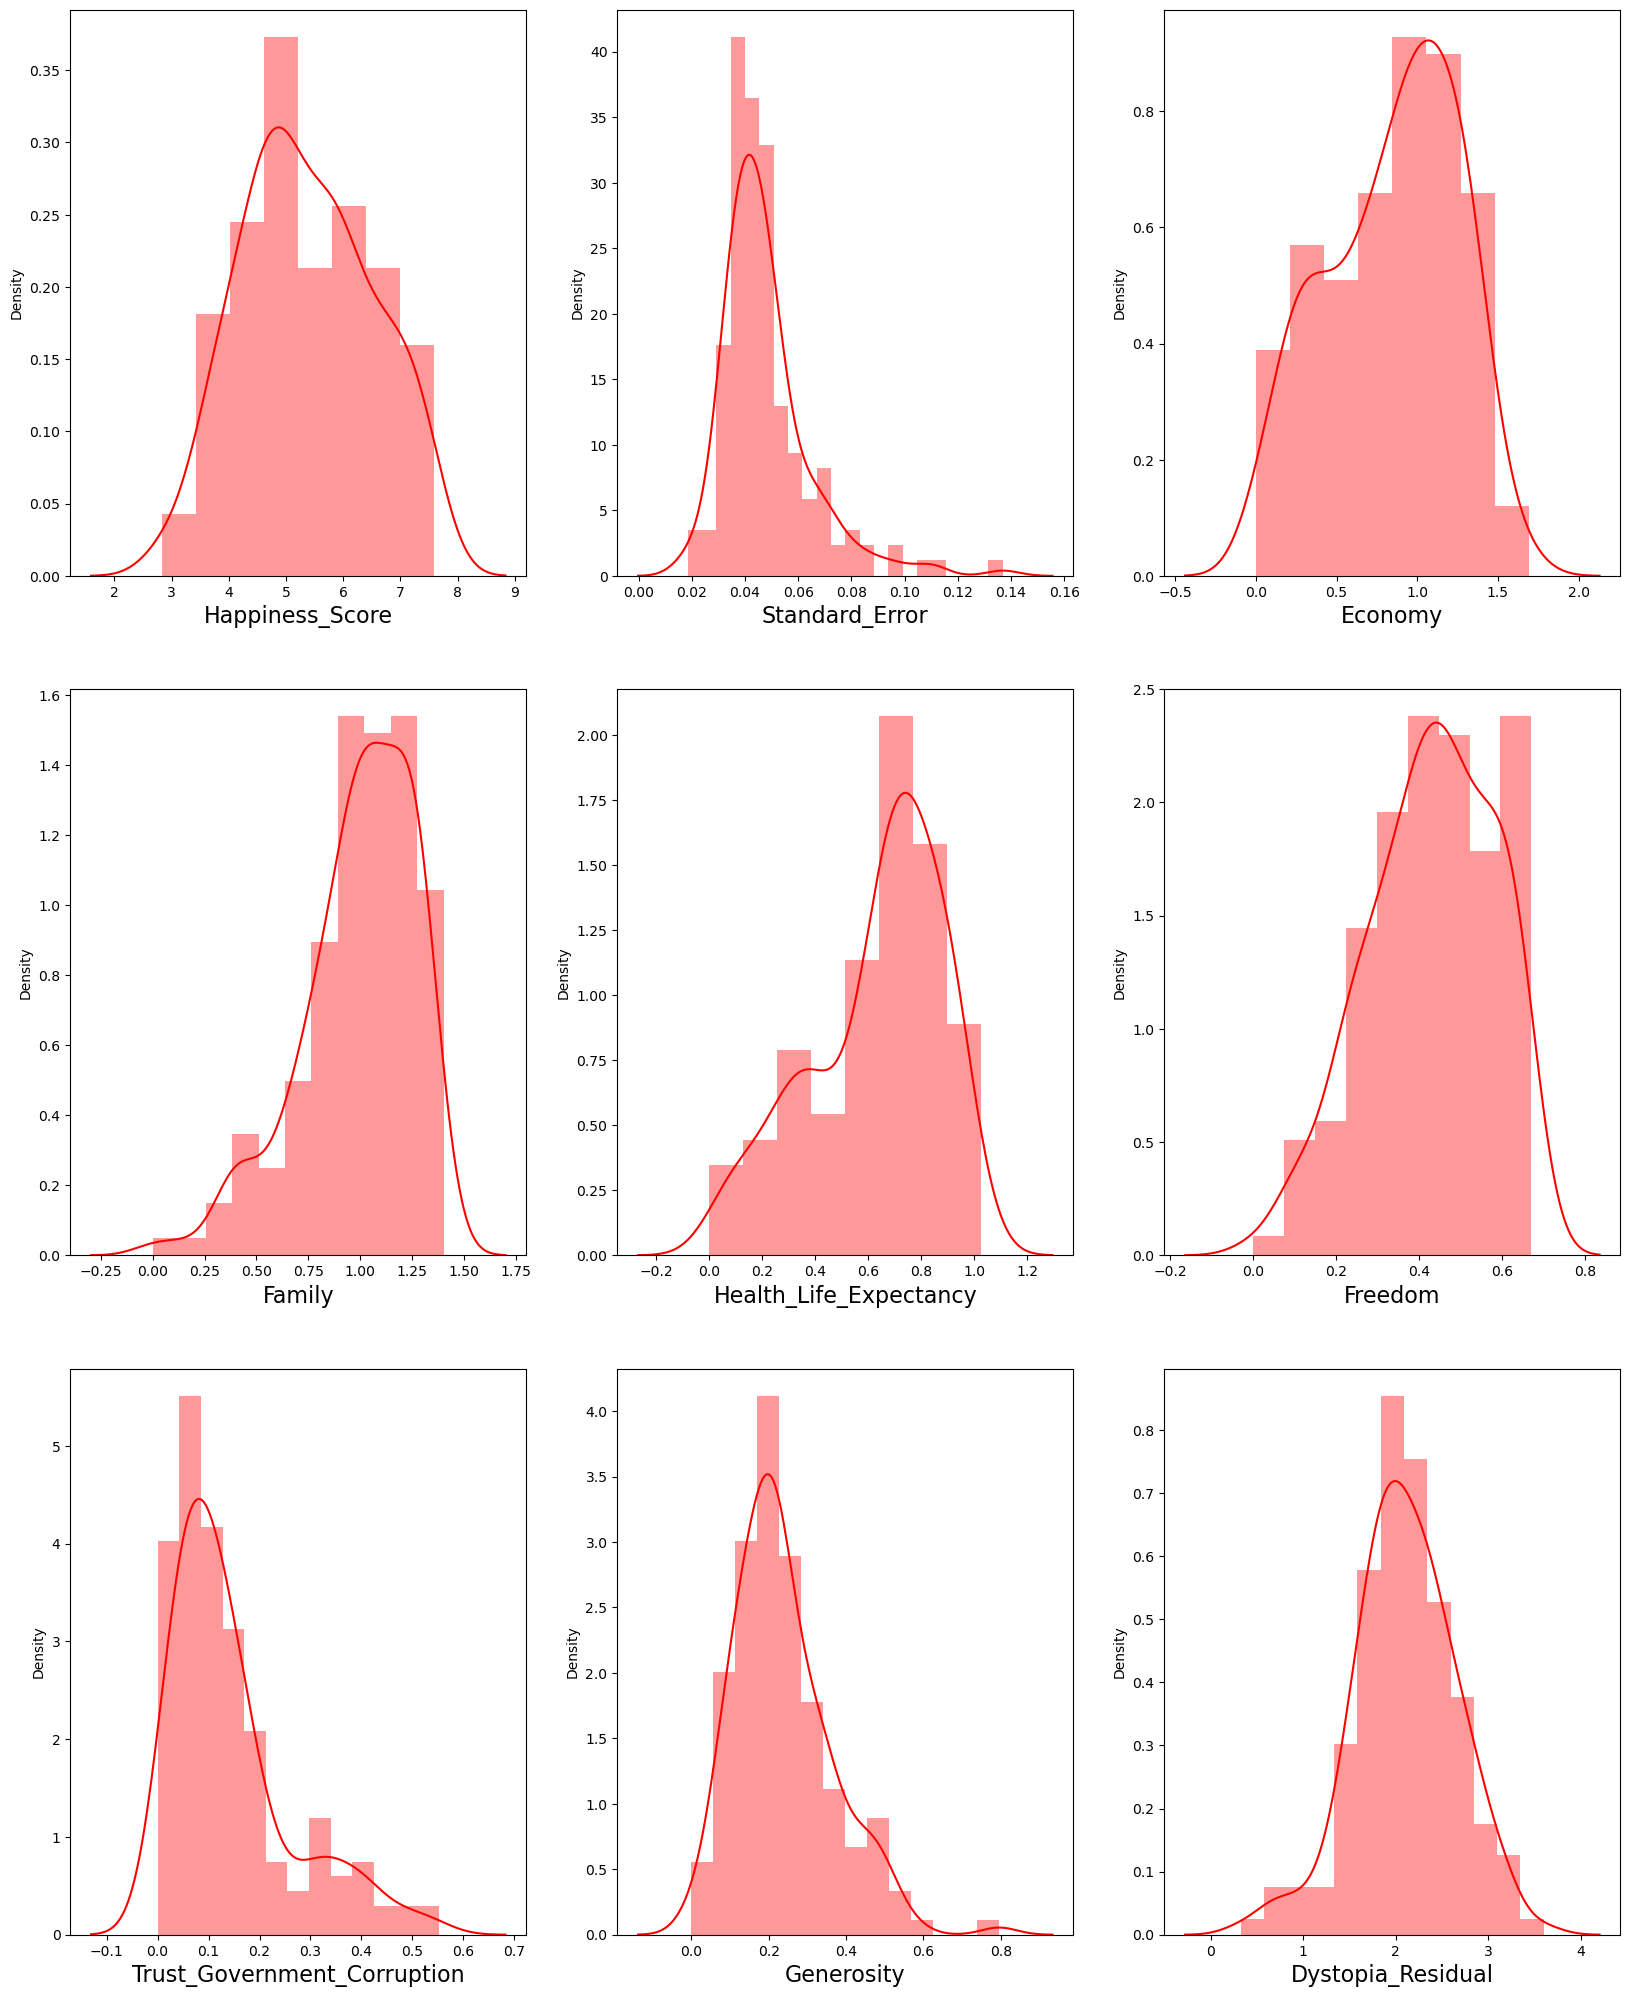

In [23]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in data.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column], color='r')
        plt.xlabel(column,fontsize=16)
    plotnumber+=1
plt.show()

In [24]:
data.skew()

Happiness_Score                0.097769
Standard_Error                 1.983439
Economy                       -0.317575
Family                        -1.006893
Health_Life_Expectancy        -0.705328
Freedom                       -0.413462
Trust_Government_Corruption    1.385463
Generosity                     1.001961
Dystopia_Residual             -0.238911
dtype: float64

## Outliers

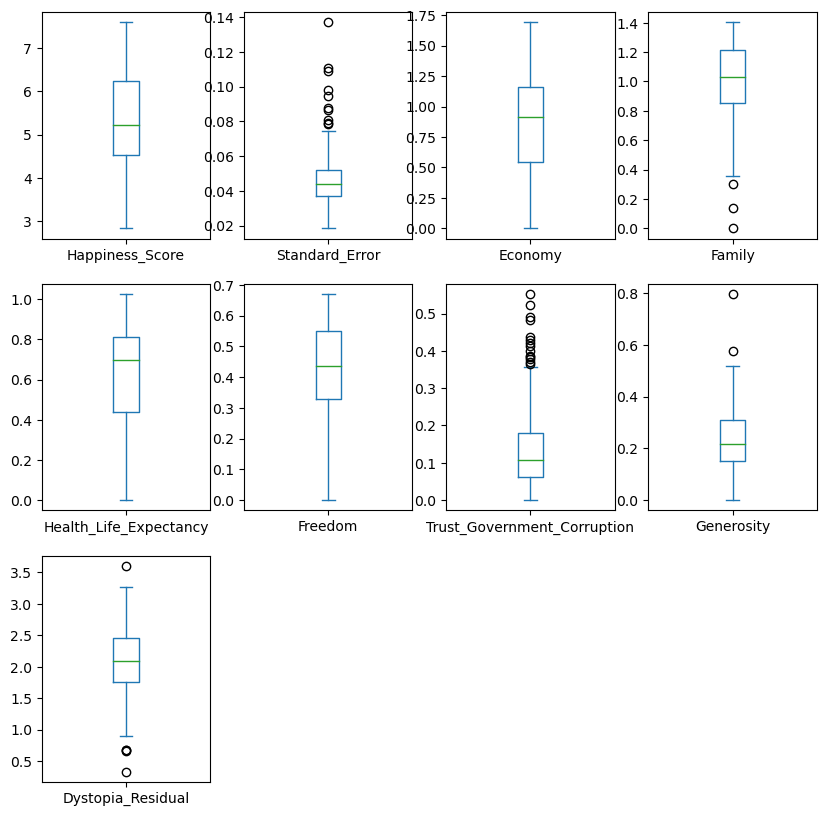

In [25]:
data.plot(kind="box",subplots=True, layout=(3,4),figsize=(10,10))
plt.show()

### Handling Outliers

In [26]:
#Importing library
from scipy.stats import zscore

# Z score method

z=np.abs(zscore(data))
threshold=3
np.where(z>3)

data1=data[(z<3).all(axis=1)]
data1

,Happiness_Score,Standard_Error,Economy,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [27]:
# Percentage of Data Loss

data_loss=(158-149)/158*100 # 158 was the number of rows in original data set and 149 after the removal of outliers
data_loss

5.69620253164557


>After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set after removing the outliers.

## Checking correlation

In [28]:
data1.corr()

,Happiness_Score,Standard_Error,Economy,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
Happiness_Score,1.000000,-0.230252,0.773577,0.720868,0.729191,0.585066,0.477692,0.250903,0.528334
Standard_Error,-0.230252,1.000000,-0.251749,-0.137879,-0.356444,-0.186465,-0.140156,-0.131970,0.045722
Economy,0.773577,-0.251749,1.000000,0.628589,0.817470,0.376780,0.342269,0.020730,0.026936
Family,0.720868,-0.137879,0.628589,1.000000,0.503890,0.474229,0.258646,0.154011,0.118062
Health_Life_Expectancy,0.729191,-0.356444,0.817470,0.503890,1.000000,0.382595,0.270605,0.129328,0.031212
Freedom,0.585066,-0.186465,0.376780,0.474229,0.382595,1.000000,0.506373,0.428718,0.058596
Trust_Government_Corruption,0.477692,-0.140156,0.342269,0.258646,0.270605,0.506373,1.000000,0.296450,0.078080
Generosity,0.250903,-0.131970,0.020730,0.154011,0.129328,0.428718,0.296450,1.000000,-0.034239
Dystopia_Residual,0.528334,0.045722,0.026936,0.118062,0.031212,0.058596,0.078080,-0.034239,1.000000


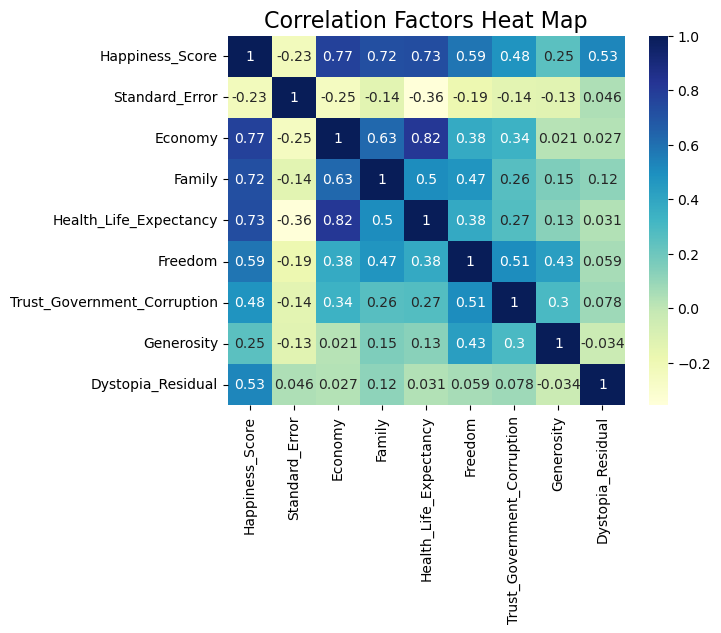

In [29]:
sns.heatmap(data1.corr(), annot =True, cmap ='YlGnBu').set_title('Correlation Factors Heat Map', size = '16')
plt.show()

In [30]:
correlation_with_label = data1.corr()['Happiness_Score'].abs().sort_values(ascending=False)
print(correlation_with_label)

Happiness_Score                1.000000
Economy                        0.773577
Health_Life_Expectancy         0.729191
Family                         0.720868
Freedom                        0.585066
Dystopia_Residual              0.528334
Trust_Government_Corruption    0.477692
Generosity                     0.250903
Standard_Error                 0.230252
Name: Happiness_Score, dtype: float64


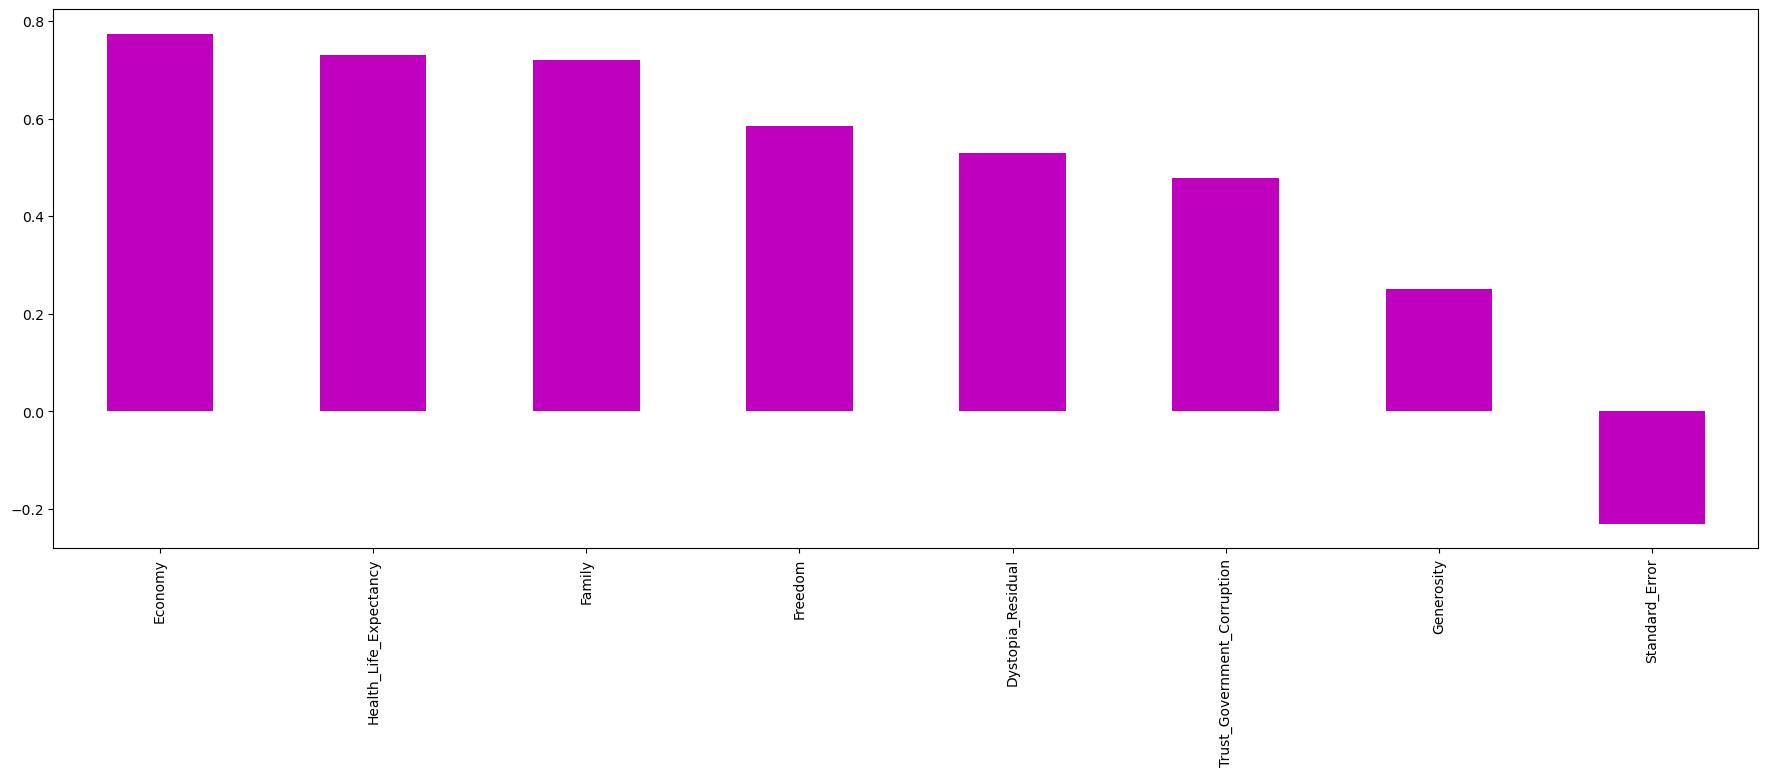

In [31]:
#Checking positive and Negative column

plt.figure(figsize=(22,7))
data1.corr()['Happiness_Score'].sort_values(ascending=False).drop(['Happiness_Score']).plot(kind='bar',color='m')
plt.xlabel=('Feature')
plt.ylabel=('column with target names')
plt.title=('correlation')
plt.show()

In [32]:
df_corr = data1.corr()
correlation_threshold = 0.8
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)
features_to_drop

{'Health_Life_Expectancy'}

In [33]:
#Dropping the column
data1 = data1.drop(['Health_Life_Expectancy'], axis=1)
data1.head()

,Happiness_Score,Standard_Error,Economy,Family,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176


## Spliting into feature and label

In [34]:
X = data1.drop('Happiness_Score', axis=1) # List of all features
y = data1['Happiness_Score'] # Data of our label
X

,Standard_Error,Economy,Family,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328


In [35]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness_Score, Length: 149, dtype: float64

## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Standard_Error,Economy,Family,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,-0.866786,1.381916,1.357879,1.583704,2.472255,0.546305,0.756876
1,0.185669,1.138324,1.567882,1.338953,0.009247,1.713898,1.109300
2,-0.926089,1.198220,1.401974,1.476027,3.036747,0.919630,0.708507
3,-0.531687,1.543526,1.283947,1.611371,1.987759,0.966495,0.657485
4,-0.765327,1.200315,1.250726,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...
144,0.369294,-1.026255,-0.945943,0.274090,0.343483,-0.249803,-1.343100
145,-0.214450,-1.562163,-0.624365,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.100427,-1.402596,-2.811354,-1.285662,-0.382420,1.118051,-0.322135
147,-0.691734,-1.488379,-2.608163,0.379439,-0.533653,-0.409226,-0.930702


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 

maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=i)
    gb=GradientBoostingRegressor(n_estimators=100)
    gb.fit(X_train,y_train)
    y_pred=gb.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.9624604750284096 on Random_state 22


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=23)

### Model Training & Testing

In [41]:
#Linear Regression
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9942668463219303
MAE 0.07201539628184009


In [42]:
#Ridge Regression
R = Ridge(alpha=10)
R.fit(X_train,y_train)
y_pred = R.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9915070860723721
MAE 0.0848178011659196


In [43]:
#Lasso Regression
L = Lasso(alpha=0.001)
L.fit(X_train,y_train)
y_pred = L.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9943446014982708
MAE 0.07128693838892544


In [44]:
#Decision Tree Regressor
DT = DecisionTreeRegressor(max_depth=5)
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8191099791042271
MAE 0.39252253968253986


In [45]:
#Random Forest Regressor
RF = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.75,
                             max_features=0.75,
                             max_depth=10)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9234070092645572
MAE 0.241766110714286


In [46]:
#Extra Tree Regressor
ET = ExtraTreesRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=10,
                           bootstrap=True)

ET.fit(X_train,y_train)
y_pred = ET.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9276885736874863
MAE 0.24548270555555582


In [47]:
#Ada Boost Regressor
AB = AdaBoostRegressor(n_estimators=100,learning_rate=1.0)
AB.fit(X_train,y_train)
y_pred = AB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8858782338520926
MAE 0.29663106008906936


In [48]:
#Gradient Boosting Regressor
GB = GradientBoostingRegressor(n_estimators=100)
GB.fit(X_train,y_train)
y_pred = GB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9597092517986718
MAE 0.17873649639432498


### DataFrame of all The models

In [ ]:
models = {
    'Linear Regression': LR,
    'Ridge': R,
    'Lasso': L,
    'Decision Tree':DT,
    'Random Forest': RF,
    'Extra Trees': ET,
    'AdaBoost': AB,
    'Gradient Boosting': GB,
    'XGBoost': XG
}

results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE'])

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'MAE': mae}, ignore_index=True)
    results_df_sorted = results_df.sort_values('R2 Score',ascending=False)
    
results_df_sorted

In [ ]:
# Train the XGBoost model (I have already trained and named it 'XG')
GB.fit(X_train, y_train)

importances = GB.feature_importances_
feature_names = X_train.columns
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(6,4))
sns.barplot(x='Feature', y='Importance', data=feature_importances_df)
plt.xticks(rotation=90, fontsize=8)
plt.show()


>Here we can see the importance of the feature in prediction

In [51]:
import pickle

filename = 'world_happiness.pkl'
pickle.dump(GB, open(filename, 'wb'))
pickle.dump(scaler, open('scaler.pkl','wb'))